# Anne Griffin General Assembly Data Science Final Project

### Hypothesis/Problem Statement

Null Hypothesis: There is no correlation between a user’s age, gender, and other user info and the destination country they will first book.

Alternative Hypothesis: Using basic info about the user such as age, gender, and other attributes such as device and when and how they signed up, we can predict which country where they are likely to book their first trip.

#### Step 1: Load Python Libraries

In [1]:
#imports
from __future__ import division
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/Users/annegriffin/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Step 2: Reading my datasets

In [2]:
raw_train_data = pd.read_csv("../data/train_users_2.csv")  
raw_test_data = pd.read_csv("../data/test_users.csv") 
raw_bkts_data = pd.read_csv("../data/age_gender_bkts.csv") 

In [3]:
raw_test_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


#### Step 3: Cleaning my data

In [4]:
#scrub a dub dub
train_data = raw_train_data.dropna()
test_data = raw_test_data.dropna(subset=['age'])
train_data = train_data[train_data.gender != '-unknown-'] #dropping "-unknown-" value for gender
test_data = test_data[test_data.gender != '-unknown-']
train_data["age"] = train_data["age"].astype(int) #converting age from a float to an int
test_data["age"] = test_data["age"].astype(int)
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


In [5]:
test_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
5,szx28ujmhf,2014-07-01,20140701000336,NaN,FEMALE,28,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,20140701000514,NaN,MALE,48,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
11,fyomoivygn,2014-07-01,20140701002531,NaN,FEMALE,30,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
12,iq4kkd5oan,2014-07-01,20140701002539,NaN,MALE,24,facebook,0,en,direct,direct,linked,Web,Mac Desktop,Safari


In [6]:
train_data.drop(train_data[train_data.age > 100].index, inplace=True) #dropping people older than 100
train_data.drop(train_data[train_data.age < 14].index, inplace=True) #dropping people younger than 14

test_data.drop(test_data[test_data.age > 100].index, inplace=True) #dropping people older than 100
test_data.drop(test_data[test_data.age < 14].index, inplace=True) #dropping people younger than 14

In [7]:
train_data.sort_values(['age'], ascending = False, inplace=True)
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
45927,dt3z0yznow,2012-10-23,20121023215110,2012-10-24,FEMALE,100,facebook,12,en,api,other,untracked,iOS,Windows Desktop,Firefox,US
58678,hkfkm15avw,2013-02-02,20130202172823,2013-02-02,FEMALE,100,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,US
156038,0icboe9ie7,2014-02-23,20140223210934,2014-02-23,MALE,100,facebook,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Chrome,US
163735,kpj7p8vg8d,2014-03-16,20140316024129,2014-03-16,FEMALE,100,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,US
185270,ep9bpt3zv3,2014-05-06,20140506161243,2014-05-06,MALE,100,basic,0,en,content,google,omg,Web,Windows Desktop,IE,US


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55372 entries, 45927 to 140381
Data columns (total 16 columns):
id                         55372 non-null object
date_account_created       55372 non-null object
timestamp_first_active     55372 non-null int64
date_first_booking         55372 non-null object
gender                     55372 non-null object
age                        55372 non-null int64
signup_method              55372 non-null object
signup_flow                55372 non-null int64
language                   55372 non-null object
affiliate_channel          55372 non-null object
affiliate_provider         55372 non-null object
first_affiliate_tracked    55372 non-null object
signup_app                 55372 non-null object
first_device_type          55372 non-null object
first_browser              55372 non-null object
country_destination        55372 non-null object
dtypes: int64(3), object(13)
memory usage: 7.2+ MB


In [9]:
train_data.gender = pd.Categorical(train_data.gender).codes #making gender a catagorical variable
test_data.gender = pd.Categorical(test_data.gender).codes

In [10]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
45927,dt3z0yznow,2012-10-23,20121023215110,2012-10-24,0,100,facebook,12,en,api,other,untracked,iOS,Windows Desktop,Firefox,US
58678,hkfkm15avw,2013-02-02,20130202172823,2013-02-02,0,100,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,US
156038,0icboe9ie7,2014-02-23,20140223210934,2014-02-23,1,100,facebook,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Chrome,US
163735,kpj7p8vg8d,2014-03-16,20140316024129,2014-03-16,0,100,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,US
185270,ep9bpt3zv3,2014-05-06,20140506161243,2014-05-06,1,100,basic,0,en,content,google,omg,Web,Windows Desktop,IE,US


In [11]:
test_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,0,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
5,szx28ujmhf,2014-07-01,20140701000336,NaN,0,28,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,20140701000514,NaN,1,48,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
11,fyomoivygn,2014-07-01,20140701002531,NaN,0,30,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
12,iq4kkd5oan,2014-07-01,20140701002539,NaN,1,24,facebook,0,en,direct,direct,linked,Web,Mac Desktop,Safari


In [12]:
#getting dummies for country destinations for visualization
dummy_countries = pd.get_dummies(train_data['country_destination'], prefix='country')
dummy_countries.head()

,country_AU,country_CA,country_DE,country_ES,country_FR,country_GB,country_IT,country_NL,country_PT,country_US,country_other
45927,0,0,0,0,0,0,0,0,0,1,0
58678,0,0,0,0,0,0,0,0,0,1,0
156038,0,0,0,0,0,0,0,0,0,1,0
163735,0,0,0,0,0,0,0,0,0,1,0
185270,0,0,0,0,0,0,0,0,0,1,0


In [13]:
# making country destination catagorical variable for model
train_data.country_destination = pd.Categorical(train_data.country_destination).codes 
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
45927,dt3z0yznow,2012-10-23,20121023215110,2012-10-24,0,100,facebook,12,en,api,other,untracked,iOS,Windows Desktop,Firefox,9
58678,hkfkm15avw,2013-02-02,20130202172823,2013-02-02,0,100,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,9
156038,0icboe9ie7,2014-02-23,20140223210934,2014-02-23,1,100,facebook,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Chrome,9
163735,kpj7p8vg8d,2014-03-16,20140316024129,2014-03-16,0,100,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,9
185270,ep9bpt3zv3,2014-05-06,20140506161243,2014-05-06,1,100,basic,0,en,content,google,omg,Web,Windows Desktop,IE,9


In [14]:
key_variables = train_data[['age', 'gender']].join(dummy_countries.ix[:, 'country_AU':])
key_variables.head()

/Users/annegriffin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,age,gender,country_AU,country_CA,country_DE,country_ES,country_FR,country_GB,country_IT,country_NL,country_PT,country_US,country_other
45927,100,0,0,0,0,0,0,0,0,0,0,1,0
58678,100,0,0,0,0,0,0,0,0,0,0,1,0
156038,100,1,0,0,0,0,0,0,0,0,0,1,0
163735,100,0,0,0,0,0,0,0,0,0,0,1,0
185270,100,1,0,0,0,0,0,0,0,0,0,1,0


In [15]:
pred_variables = train_data[['age','gender', 'country_destination']]
pred_variables.head()

,age,gender,country_destination
45927,100,0,9
58678,100,0,9
156038,100,1,9
163735,100,0,9
185270,100,1,9


#### Step 4: Visualizing Data

###### Distribution of Variables

In [16]:
#making cross tab to see breakdown of gender
pd.factorize(train_data['gender'])


(array([0, 0, 1, ..., 0, 0, 1]), Int64Index([0, 1, 2], dtype='int64'))

In [17]:
my_tab = pd.crosstab(index=train_data["gender"],  # Make a crosstab
                              columns="count") 
my_tab

col_0,count
gender,
0,29385
1,25828
2,159


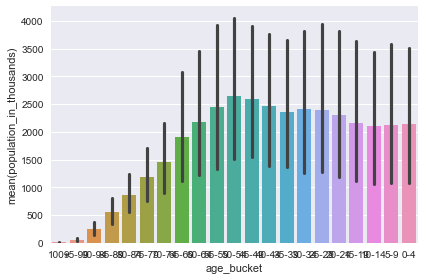

In [18]:
sns.barplot(x='age_bucket', y='population_in_thousands', data=raw_bkts_data)
sns.despine()
plt.tight_layout()
#this is for both genders
#since in this simple version I didn't join the age brackets csv, I didn't do anything special to this data to convert
#...it to numerical values.  This shows the buckets in reverse order.

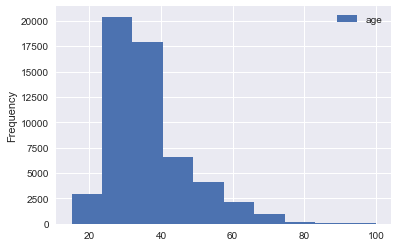

In [19]:
train_data[["age"]].plot(kind="hist");

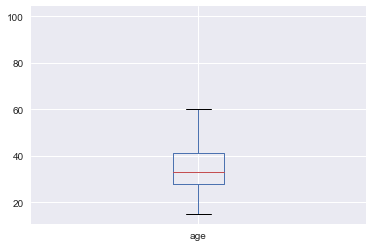

In [20]:
train_data[['age']].plot(kind='box');

In [21]:
train_data.sort_values('age', ascending = False).head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
45927,dt3z0yznow,2012-10-23,20121023215110,2012-10-24,0,100,facebook,12,en,api,other,untracked,iOS,Windows Desktop,Firefox,9
58678,hkfkm15avw,2013-02-02,20130202172823,2013-02-02,0,100,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,9
156038,0icboe9ie7,2014-02-23,20140223210934,2014-02-23,1,100,facebook,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Chrome,9
163735,kpj7p8vg8d,2014-03-16,20140316024129,2014-03-16,0,100,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,9
185270,ep9bpt3zv3,2014-05-06,20140506161243,2014-05-06,1,100,basic,0,en,content,google,omg,Web,Windows Desktop,IE,9


In [22]:
bucketf = raw_bkts_data.loc[raw_bkts_data['gender'] == 'female']
bucketf.head()

,age_bucket,country_destination,gender,population_in_thousands,year
21,100+,AU,female,4.0,2015.0
22,95-99,AU,female,25.0,2015.0
23,90-94,AU,female,94.0,2015.0
24,85-89,AU,female,179.0,2015.0
25,80-84,AU,female,252.0,2015.0


In [23]:
bucketm = raw_bkts_data.loc[raw_bkts_data['gender'] == 'male']
bucketm.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [24]:
bucketm

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


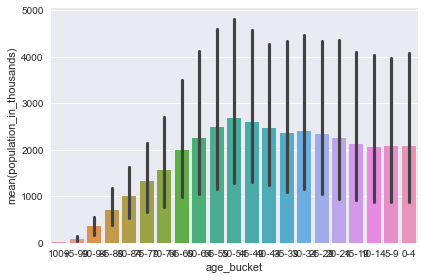

In [25]:
sns.barplot(x='age_bucket', y='population_in_thousands', data=bucketf)
sns.despine()
plt.tight_layout()
#this is only for women

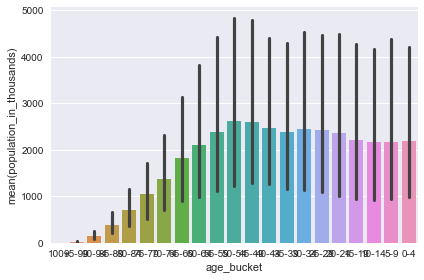

In [26]:
sns.barplot(x='age_bucket', y='population_in_thousands', data=bucketm)
sns.despine()
plt.tight_layout()
#this is only for men

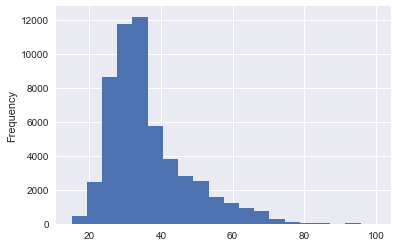

In [27]:
train_data['age'].plot(kind='hist', bins = 20)

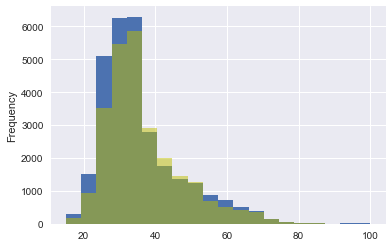

In [28]:
#blue is women, yellow is men, shows the difference in the female and male distributions
f_train_data = train_data.loc[train_data['gender'] == 0]
m_train_data = train_data.loc[train_data['gender'] == 1]
f_train_data['age'].plot(kind='hist', bins = 20)
m_train_data['age'].plot(kind='hist', bins = 20, color = 'y', alpha = 0.5)

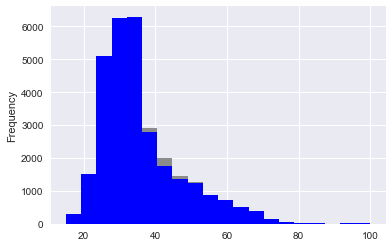

In [29]:
m_train_data['age'].plot(kind='hist', bins = 20, color = '0.55')
f_train_data['age'].plot(kind='hist', bins = 20, color = 'b')

######  Relationship Between Independent Variables and Dependent Variable

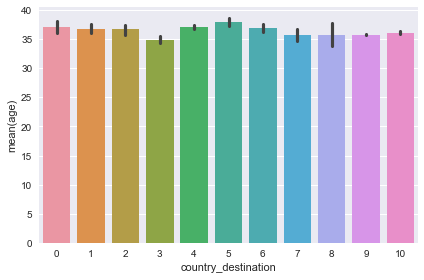

In [30]:
#Looking at median age for the new users visiting each country.
sns.barplot(x='country_destination', y='age', data=train_data)
sns.despine()
plt.tight_layout()

In [31]:
gender_groups = train_data.groupby(['gender' , 'country_destination'])

In [32]:
gender_groups.size()

gender  country_destination
0       0                        193
        1                        419
        2                        324
        3                        791
        4                       1784
        5                        812
        6                        997
        7                        228
        8                         70
        9                      20883
        10                      2884
1       0                        172
        1                        442
        2                        389
        3                        615
        4                       1227
        5                        634
        6                        638
        7                        259
        8                         63
        9                      18181
        10                      3208
2       0                          1
        1                          5
        2                          3
        3                          4
        4 

In [33]:
age_groups = train_data.groupby(['age', 'country_destination'])

In [34]:
age_groups.size()

age  country_destination
15   9                        2
16   9                        1
17   5                        1
     9                        2
18   0                        1
     1                        8
     2                        7
     3                        1
     4                        9
     5                        4
     6                        9
     7                        3
     9                      106
     10                      24
19   0                        5
     1                       10
     2                        4
     3                       12
     4                       22
     5                        9
     6                        9
     7                        3
     8                        3
     9                      189
     10                      30
20   0                        1
     1                        1
     2                        1
     3                        8
     4                        7
               

In [35]:
len(train_data)

55372

In [36]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
45927,dt3z0yznow,2012-10-23,20121023215110,2012-10-24,0,100,facebook,12,en,api,other,untracked,iOS,Windows Desktop,Firefox,9
58678,hkfkm15avw,2013-02-02,20130202172823,2013-02-02,0,100,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,9
156038,0icboe9ie7,2014-02-23,20140223210934,2014-02-23,1,100,facebook,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Chrome,9
163735,kpj7p8vg8d,2014-03-16,20140316024129,2014-03-16,0,100,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,9
185270,ep9bpt3zv3,2014-05-06,20140506161243,2014-05-06,1,100,basic,0,en,content,google,omg,Web,Windows Desktop,IE,9


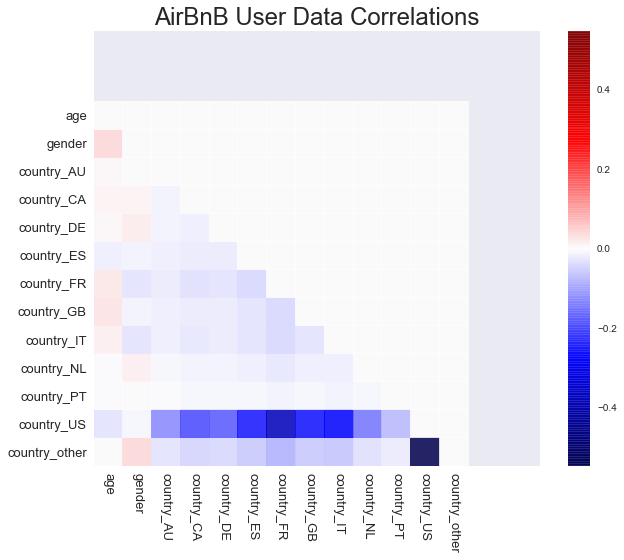

In [37]:
plt.figure(figsize = (10, 8))
corr_mat = np.tril(key_variables.corr(), k=-1)
sns.heatmap(corr_mat, cmap = 'seismic', alpha = 0.85)
plt.title('AirBnB User Data Correlations', fontsize = 24)
plt.xticks(np.arange(0.5, len(train_data.columns) + 0.5, 1), key_variables.columns, fontsize = 13, rotation = 270)
plt.yticks(np.arange(0.5, len(train_data.columns) + 0.5, 1), list(key_variables.columns)[::-1], fontsize = 13, \
           rotation = 0)
plt.show()

### Model

In [38]:
from sklearn.model_selection import train_test_split

X = pred_variables[['age', 'gender']]
y = pred_variables['country_destination']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

model = RandomForestClassifier(n_estimators = 20)

model.fit(X_train, y_train)

/Users/annegriffin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/annegriffin/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [40]:
test_features = y_test.values
pred_country = model.predict(X_test)
print(len(pred_country))

11075


In [41]:
print(pred_country)

[9 9 9 ..., 9 9 9]


In [42]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head() 

,Features,Importance Score
0,age,0.904585
1,gender,0.095415


In [43]:
from sklearn.metrics import mean_squared_error

mean_squared_error(pred_country, y_test)

5.529841986455982